# Custom Ramp Schedules

In [1]:
# Initialization and Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
project_root = Path.cwd().parent  
sys.path.append(str(project_root)) 
from src.Optimise_param import *
from src.AHC import *

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## No Ramp Schedule

In [17]:
J = - np.load('../MC_Instances/MC50_N=50_1.npz')

results = CIM_AHC_GPU(T_time=40, J=J, batch_size=1, time_step=0.01, custom_fb_schedule=None, custom_pump_schedule=None)

spin_config, x_trajectory, t, energy_plot_data, error_var_data, divg, kappa = results

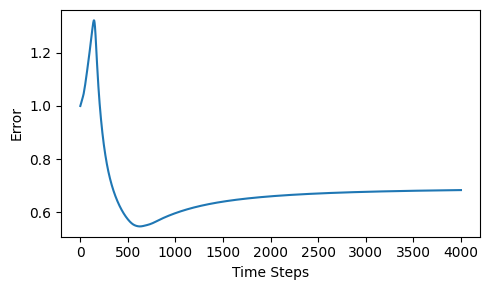

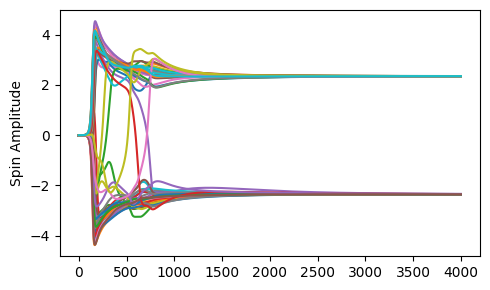

Energy reaches a steady state at: 717


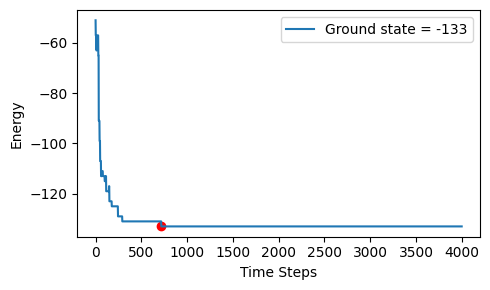

In [18]:
# Plotting the error over time
plt.figure(figsize=(5, 3))
plt.plot(error_var_data[0][0])
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

# Plotting spin amplitude for each of the first 50 spins
plt.figure(figsize=(5, 3))
for spin_index in range(50):
    plt.plot(np.arange(t+1), x_trajectory[0, spin_index, :])
plt.ylabel('Spin Amplitude')
plt.tight_layout()
plt.show()

energy_trace = energy_plot_data[0]
min_energy = np.min(energy_trace)
# Find the index of the first occurrence of the minimum energy
first_min_index = np.where(energy_trace == min_energy)[0][0]

threshold = 10  # Define a small threshold value
period = 5  # Period to check for stability
if all(abs(energy_trace[first_min_index + i] - min_energy) < threshold for i in range(period)):
    print("Energy reaches a steady state at:", first_min_index)
else:
    print("Energy reaches the lowest value at:", first_min_index, "but doesn't remain stable for the next", period, "steps.")
# Plotting the point where energy reaches steady state
plt.figure(figsize=(5, 3))
plt.plot(energy_trace, label=f'Ground state = {min_energy:.0f}')
plt.scatter(first_min_index, min_energy, color='red')  # Mark the steady state point
plt.xlabel('Time Steps')
plt.ylabel('Energy')
plt.legend()
plt.tight_layout()
plt.show()

## Linear Ramp Schedule

In [19]:
eps_0 = 0.07
r_0 = 0.2

results = CIM_AHC_GPU(
    T_time=40, 
    J=J, 
    batch_size=1, 
    time_step=0.01, 
    custom_fb_schedule=lambda ticks, time_step: custom_fb_schedule(ticks, time_step, eps_0), 
    custom_pump_schedule=lambda ticks, time_step: custom_pump_schedule(ticks, time_step, r_0)
    )
    
spin_config, x_trajectory, t, energy_plot_data, error_var_data, divg, kappa = results

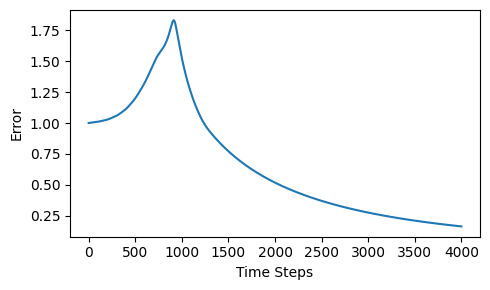

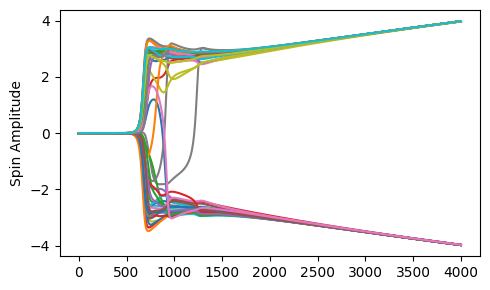

Energy reaches a steady state at: 1209


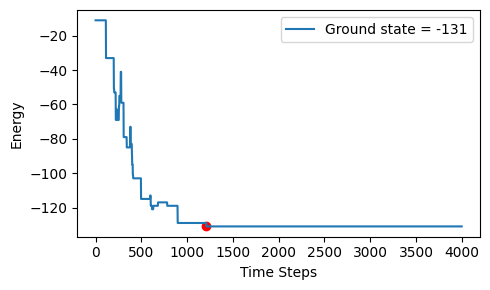

In [20]:
# Plotting the error over time
plt.figure(figsize=(5, 3))
plt.plot(error_var_data[0][0])
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

# Plotting spin amplitude for each of the first 50 spins
plt.figure(figsize=(5, 3))
for spin_index in range(50):
    plt.plot(np.arange(t+1), x_trajectory[0, spin_index, :])
plt.ylabel('Spin Amplitude')
plt.tight_layout()
plt.show()

energy_trace = energy_plot_data[0]
min_energy = np.min(energy_trace)
# Find the index of the first occurrence of the minimum energy
first_min_index = np.where(energy_trace == min_energy)[0][0]

threshold = 10  # Define a small threshold value
period = 5  # Period to check for stability
if all(abs(energy_trace[first_min_index + i] - min_energy) < threshold for i in range(period)):
    print("Energy reaches a steady state at:", first_min_index)
else:
    print("Energy reaches the lowest value at:", first_min_index, "but doesn't remain stable for the next", period, "steps.")
# Plotting the point where energy reaches steady state
plt.figure(figsize=(5, 3))
plt.plot(energy_trace, label=f'Ground state = {min_energy:.0f}')
plt.scatter(first_min_index, min_energy, color='red')  # Mark the steady state point
plt.xlabel('Time Steps')
plt.ylabel('Energy')
plt.legend()
plt.tight_layout()
plt.show()

## Optimization

Optimizing progress: 100%|██████████| 21/21 [07:23<00:00, 21.10s/it]


Best parameters found: {'eps_0': 0.05, 'r_0': 0.11}
Lowest energy recorded: -135.0


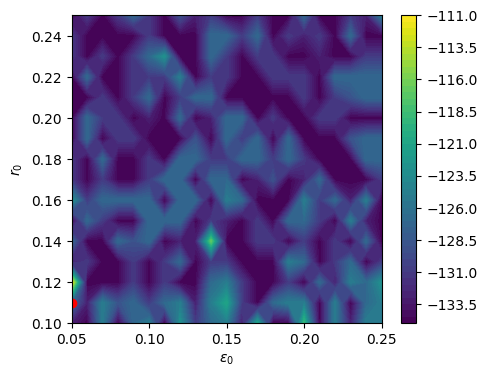

In [6]:
# Parameter ranges
eps_0_values = np.linspace(0.05, 0.25, 21)
r_0_values = np.linspace(0.1, 0.25, 16)

# Optimise parameters (Linear Schedule included)
optimize_parameters(J, eps_0_values, r_0_values)

## Try MC-100

previously fond ground state energies: [-401. -383. -395. -387. -383. -389. -387. -387. -373. -387.]


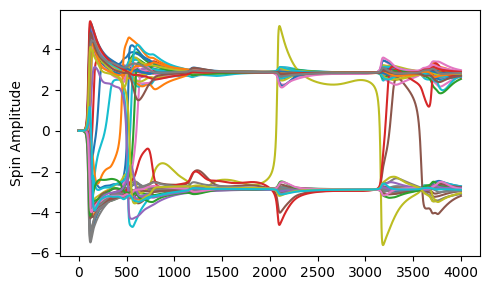

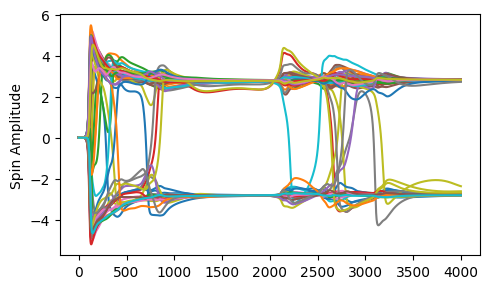

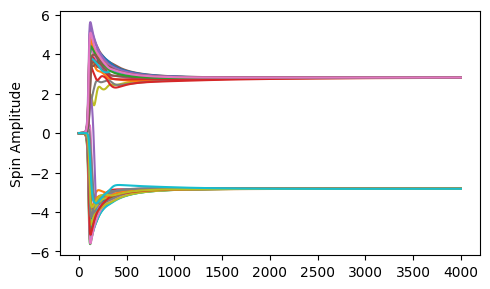

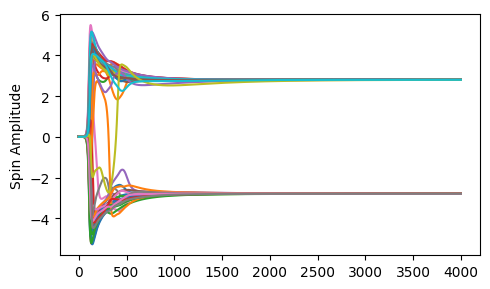

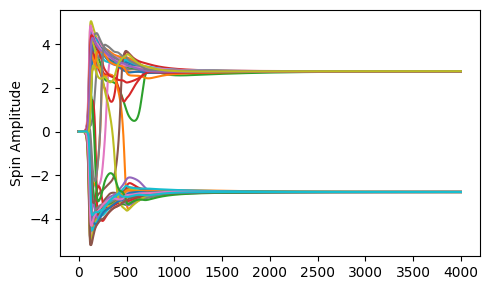

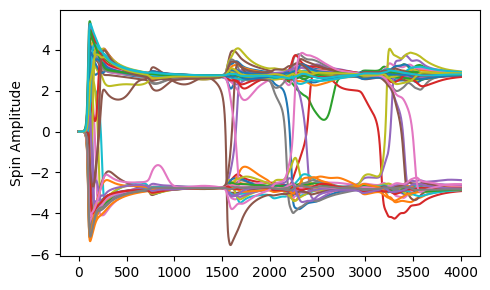

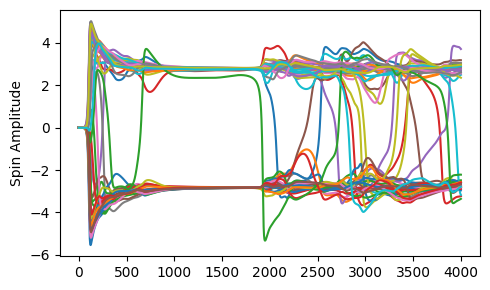

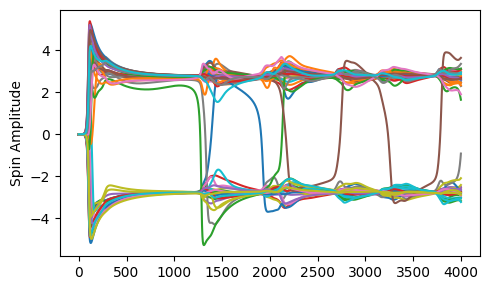

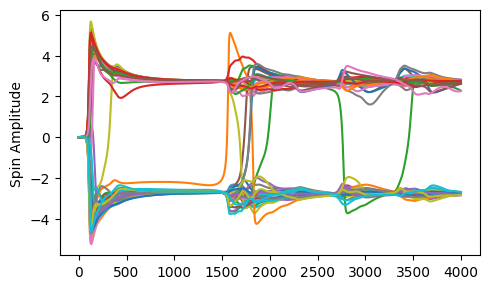

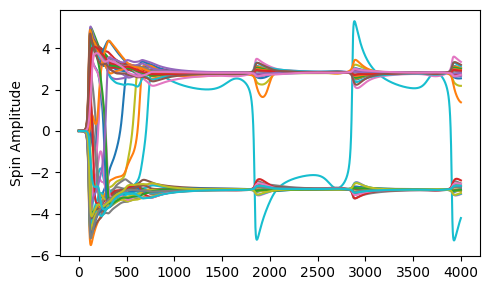

Ground energies for all instances: [-401.0, -383.0, -387.0, -381.0, -373.0, -383.0, -387.0, -379.0, -369.0, -387.0]


In [22]:
results = np.load('../MC_Instances/MC50_N=100_ground_energies.npz')
print('previously fond ground state energies:',results)

files = ['../MC_Instances/MC50_N=100_1.npz',
         '../MC_Instances/MC50_N=100_2.npz',
         '../MC_Instances/MC50_N=100_3.npz',
         '../MC_Instances/MC50_N=100_4.npz',
         '../MC_Instances/MC50_N=100_5.npz',
         '../MC_Instances/MC50_N=100_6.npz',
         '../MC_Instances/MC50_N=100_7.npz',
         '../MC_Instances/MC50_N=100_8.npz',
         '../MC_Instances/MC50_N=100_9.npz',
         '../MC_Instances/MC50_N=100_10.npz']

Ground_energies = []
for file in files:
    J = -np.load(file)
    results = CIM_AHC_GPU(
        T_time=40, 
        J=J, 
        batch_size=1, 
        time_step=0.01, 
        custom_fb_schedule=None, 
        custom_pump_schedule=None
    )
    
    spin_config, x_trajectory, t, energy_plot_data, error_var_data, divg, kappa = results
    energy_trace = energy_plot_data[0]
    min_energy = np.min(energy_trace)
    Ground_energies.append(min_energy)
    # Plotting spin amplitude for each of the first 50 spins
    plt.figure(figsize=(5, 3))
    for spin_index in range(50):
        plt.plot(np.arange(t+1), x_trajectory[0, spin_index, :])
    plt.ylabel('Spin Amplitude')
    plt.tight_layout()
    plt.show()

print("Ground energies for all instances:", Ground_energies)
    

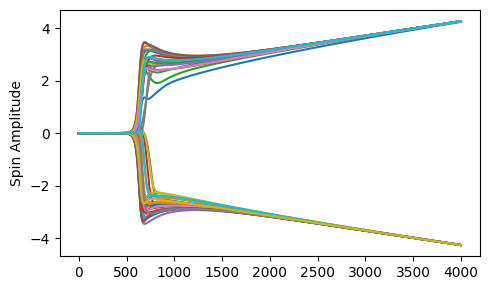

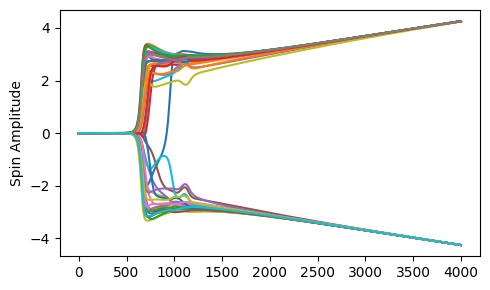

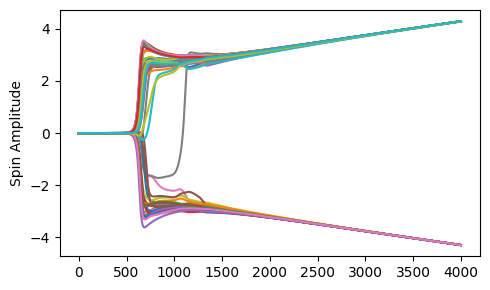

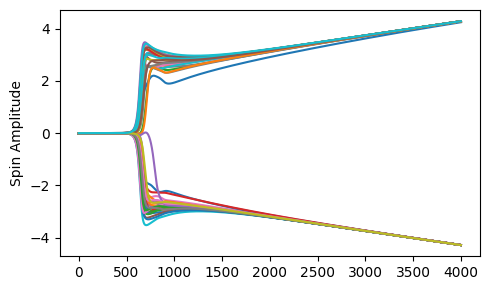

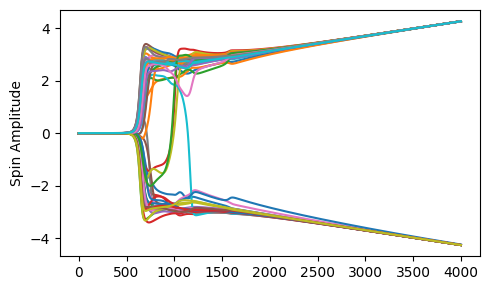

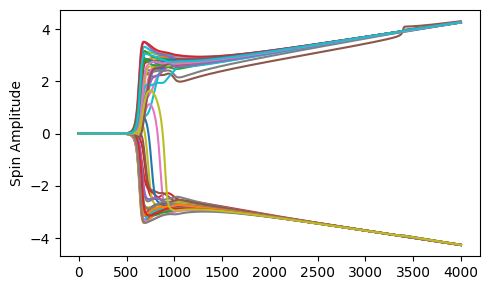

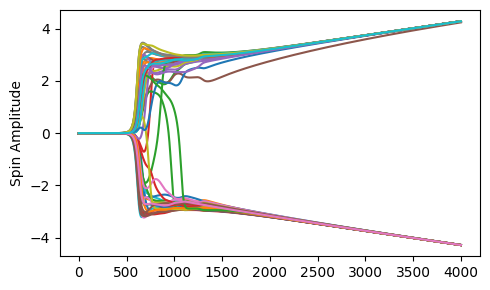

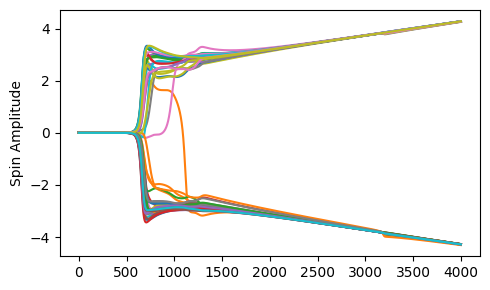

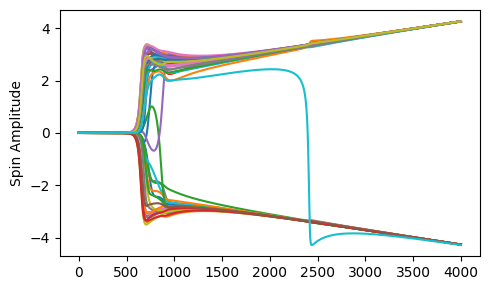

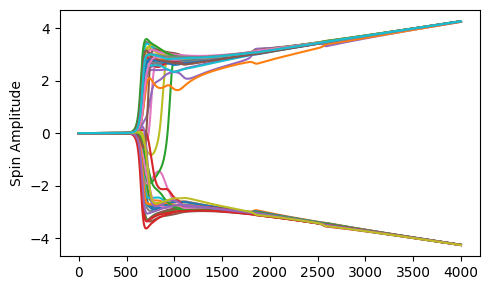

Ground energies for all instances: [-361.0, -341.0, -389.0, -377.0, -349.0, -355.0, -379.0, -373.0, -349.0, -355.0]


In [25]:
eps_0 = 0.05
r_0 = 0.25

Ground_energies = []
for file in files:
    J = -np.load(file)
    results = CIM_AHC_GPU(
        T_time=40, 
        J=J, 
        batch_size=1, 
        time_step=0.01, 
        custom_fb_schedule=lambda ticks, time_step: custom_fb_schedule(ticks, time_step, eps_0),
        custom_pump_schedule=lambda ticks, time_step: custom_pump_schedule(ticks, time_step, r_0)
    )
    
    spin_config, x_trajectory, t, energy_plot_data, error_var_data, divg, kappa = results
    energy_trace = energy_plot_data[0]
    min_energy = np.min(energy_trace)
    Ground_energies.append(min_energy)
    # Plotting spin amplitude for each of the first 50 spins
    plt.figure(figsize=(5, 3))
    for spin_index in range(50):
        plt.plot(np.arange(t+1), x_trajectory[0, spin_index, :])
    plt.ylabel('Spin Amplitude')
    plt.tight_layout()
    plt.show()

print("Ground energies for all instances:", Ground_energies)

In [26]:
eps_0 = 0.07
r_0 = 0.2

Ground_energies = []
for file in files:
    J = -np.load(file)
    min_bound = [0.05, 0.1]
    max_bound = [0.15, 0.25]
    controller = mloop_optimize(J, min_bound, max_bound)
    print(f'Best parameters found: {controller.best_params}')
    print(f'Best cost found: {controller.best_cost}')
    Ground_energies.append(controller.best_cost)

INFO     Optimization started.
INFO     Run: 0 (training)
INFO     params [0.10975953 0.11718752]
INFO     cost -401.0 +/- 0.0
INFO     Run: 1 (training)
INFO     params [0.08414764 0.17786687]
INFO     cost -401.0 +/- 0.0
INFO     Run: 2 (training)
INFO     params [0.09370202 0.11860073]
INFO     cost -357.0 +/- 0.0
INFO     Run: 3 (training)
INFO     params [0.09834811 0.19369404]
INFO     cost -401.0 +/- 0.0
INFO     Run: 4 (training)
INFO     params [0.14922023 0.10252421]
INFO     cost -401.0 +/- 0.0
INFO     Run: 5 (training)
INFO     params [0.14764121 0.19224186]
INFO     cost -379.0 +/- 0.0
INFO     Run: 6 (training)
INFO     params [0.08083626 0.1601874 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 7 (training)
INFO     params [0.14024657 0.14311906]
INFO     cost -401.0 +/- 0.0
INFO     Run: 8 (training)
INFO     params [0.06801086 0.17045529]
INFO     cost -371.0 +/- 0.0
INFO     Run: 9 (training)
INFO     params [0.10890001 0.24621145]
INFO     cost -401.0 +/- 0.0
INFO     

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -401.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.15       0.24404306]
INFO     cost -401.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -369.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -401.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.10975953 0.11718752]
INFO     cost -401.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.13522775 0.21078477]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -365.0 +/- 0.0
INFO     Run: 22 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -381.0 +/- 0.0
INFO     Run: 23 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 24 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 25 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 26 (trainer)
INFO     params [0.13708365 0.17292233]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -391.0 +/- 0.0
INFO     Run: 27 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 28 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 29 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -395.0 +/- 0.0
INFO     Run: 30 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -391.0 +/- 0.0
INFO     Run: 31 (trainer)
INFO     params [0.13990726 0.16187393]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -401.0 +/- 0.0
INFO     Run: 32 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 33 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 34 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -379.0 +/- 0.0
INFO     Run: 35 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -391.0 +/- 0.0
INFO     Run: 36 (trainer)
INFO     params [0.08014087 0.10499829]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -391.0 +/- 0.0
INFO     Run: 37 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -391.0 +/- 0.0
INFO     Run: 38 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 39 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 40 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 41 (trainer)
INFO     params [0.07335195 0.20598734]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -363.0 +/- 0.0
INFO     Run: 42 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 43 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -391.0 +/- 0.0
INFO     Run: 44 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 45 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -401.0 +/- 0.0
INFO     Run: 46 (trainer)
INFO     params [0.13645986 0.13407523]
INFO     cost -401.0 +/- 0.0
INFO     Run: 47 (machine learner)
INFO     params [0.10912332 0.11724356]
INFO     cost -401.0 +/- 0.0
INFO     Run: 48 (machine learner)
INFO     params [0.10535177 0.11964872]
INFO     cost -401.0 +/- 0.0
INFO     Run: 49 (machine learner)
INFO     params [0.05857229 0.21257357]
INFO     cost -389.0 +/- 0.0
INFO     Run: 50 (machine learner)
INFO     params [0.10948195 0.11721207]
INFO     cost -401.0 +/- 0.0
INFO     Run: 51 (trainer)
INFO     params [0.10715826 0.12540641]
INFO     cost -401.0 +/-

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -363.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.11674414 0.10555026]
INFO     cost -383.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.11980358 0.10862916]
INFO     cost -363.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.12203333 0.11086782]
INFO     cost -367.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.14529928 0.19008058]
INFO     cost -383.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.07550911 0.18222541]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 8.239434059383963e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -379.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.13846541 0.12872423]
INFO     cost -383.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.11813809 0.23991591]
INFO     cost -375.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.13931855 0.12284181]
INFO     cost -383.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.1377141 0.1266138]
INFO     cost -383.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.10987278 0.14388207]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 9.047025476401879e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -383.0 +/- 0.0
INFO     Run: 22 (machine learner)
INFO     params [0.1473902  0.19028842]
INFO     cost -371.0 +/- 0.0
INFO     Run: 23 (machine learner)
INFO     params [0.14162872 0.12647549]
INFO     cost -383.0 +/- 0.0
INFO     Run: 24 (machine learner)
INFO     params [0.07532258 0.17472555]
INFO     cost -363.0 +/- 0.0
INFO     Run: 25 (machine learner)
INFO     params [0.13897528 0.12579785]
INFO     cost -371.0 +/- 0.0
INFO     Run: 26 (trainer)
INFO     params [0.10619971 0.12581992]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 9.03466847196034e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -367.0 +/- 0.0
INFO     Run: 27 (machine learner)
INFO     params [0.13945361 0.12167994]
INFO     cost -373.0 +/- 0.0
INFO     Run: 28 (machine learner)
INFO     params [0.05017347 0.1174733 ]
INFO     cost -355.0 +/- 0.0
INFO     Run: 29 (machine learner)
INFO     params [0.13701155 0.12839371]
INFO     cost -375.0 +/- 0.0
INFO     Run: 30 (machine learner)
INFO     params [0.13774725 0.12758908]
INFO     cost -383.0 +/- 0.0
INFO     Run: 31 (trainer)
INFO     params [0.088218   0.17523601]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 8.087355742145557e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -375.0 +/- 0.0
INFO     Run: 32 (machine learner)
INFO     params [0.11060044 0.14396504]
INFO     cost -365.0 +/- 0.0
INFO     Run: 33 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -383.0 +/- 0.0
INFO     Run: 34 (machine learner)
INFO     params [0.11047835 0.14566696]
INFO     cost -373.0 +/- 0.0
INFO     Run: 35 (machine learner)
INFO     params [0.13802946 0.12761301]
INFO     cost -383.0 +/- 0.0
INFO     Run: 36 (trainer)
INFO     params [0.07497913 0.24905141]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 8.459556289622543e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -349.0 +/- 0.0
INFO     Run: 37 (machine learner)
INFO     params [0.13719365 0.12668246]
INFO     cost -353.0 +/- 0.0
INFO     Run: 38 (machine learner)
INFO     params [0.14448297 0.18992869]
INFO     cost -373.0 +/- 0.0
INFO     Run: 39 (machine learner)
INFO     params [0.10848132 0.16773514]
INFO     cost -353.0 +/- 0.0
INFO     Run: 40 (machine learner)
INFO     params [0.13772399 0.12706452]
INFO     cost -383.0 +/- 0.0
INFO     Run: 41 (trainer)
INFO     params [0.08976485 0.24614874]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 5.766283993731702e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -379.0 +/- 0.0
INFO     Run: 42 (machine learner)
INFO     params [0.1380062  0.12669255]
INFO     cost -359.0 +/- 0.0
INFO     Run: 43 (machine learner)
INFO     params [0.0501526  0.12311938]
INFO     cost -359.0 +/- 0.0
INFO     Run: 44 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -353.0 +/- 0.0
INFO     Run: 45 (machine learner)
INFO     params [0.13789574 0.12672679]
INFO     cost -383.0 +/- 0.0
INFO     Run: 46 (trainer)
INFO     params [0.05693323 0.22916542]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 5.248309173044978e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -357.0 +/- 0.0
INFO     Run: 47 (machine learner)
INFO     params [0.13773648 0.12720441]
INFO     cost -371.0 +/- 0.0
INFO     Run: 48 (machine learner)
INFO     params [0.14174579 0.16710375]
INFO     cost -369.0 +/- 0.0
INFO     Run: 49 (machine learner)
INFO     params [0.14175668 0.16721306]
INFO     cost -373.0 +/- 0.0
INFO     Run: 50 (machine learner)
INFO     params [0.13782475 0.12672566]
INFO     cost -383.0 +/- 0.0
INFO     Run: 51 (trainer)
INFO     params [0.11611727 0.11620914]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 5.414527612731647e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -351.0 +/- 0.0
INFO     Run: 52 (machine learner)
INFO     params [0.1378281  0.12657895]
INFO     cost -365.0 +/- 0.0
INFO     Run: 53 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 54 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 55 (machine learner)
INFO     params [0.13770482 0.12658453]
INFO     cost -383.0 +/- 0.0
INFO     Run: 56 (trainer)
INFO     params [0.05028837 0.14234102]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -379.0 +/- 0.0
INFO     Run: 57 (machine learner)
INFO     params [0.13783256 0.12686856]
INFO     cost -383.0 +/- 0.0
INFO     Run: 58 (machine learner)
INFO     params [0.12228122 0.14832302]
INFO     cost -369.0 +/- 0.0
INFO     Run: 59 (machine learner)
INFO     params [0.12204367 0.14865718]
INFO     cost -383.0 +/- 0.0
INFO     Run: 60 (machine learner)
INFO     params [0.13767609 0.12664799]
INFO     cost -359.0 +/- 0.0
INFO     Run: 61 (trainer)
INFO     params [0.07321775 0.12028047]
INFO     cost -371.0 +/- 0.0
INFO     Run: 62 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 63 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -369.0 +/- 0.0
INFO     Run: 64 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 65 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -373.0 +/- 0.0
INFO     Run: 66 (trainer)
INFO     params [0.11814888 0.10897604]
INFO     cost -373.0 +/-

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -359.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.14846882 0.15699322]
INFO     cost -387.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -379.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -395.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.14846743 0.15690819]
INFO     cost -387.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.11475462 0.12273769]
INFO     cost -387.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.14839788 0.15445733]
INFO     cost -387.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.08705674 0.23503738]
INFO     cost -387.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.14839707 0.15174763]
INFO     cost -395.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.14846683 0.15686136]
INFO     cost -387.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.07212626 0.1793112 ]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -367.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.11083824 0.19152265]
INFO     cost -381.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.06664169 0.24847327]
INFO     cost -357.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.10491379 0.19288318]
INFO     cost -379.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.07495498 0.24649381]
INFO     cost -363.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.06449405 0.11682979]
INFO     cost -385.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.09991799 0.1       ]
INFO     cost -379.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.09473513 0.1       ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -379.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.10421846 0.10696708]
INFO     cost -371.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.1476665  

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -381.0 +/- 0.0
INFO     Run: 32 (machine learner)
INFO     params [0.12315112 0.13702086]
INFO     cost -353.0 +/- 0.0
INFO     Run: 33 (machine learner)
INFO     params [0.13115215 0.14902241]
INFO     cost -375.0 +/- 0.0
INFO     Run: 34 (machine learner)
INFO     params [0.13915319 0.16102396]
INFO     cost -363.0 +/- 0.0
INFO     Run: 35 (machine learner)
INFO     params [0.11552082 0.12557541]
INFO     cost -387.0 +/- 0.0
INFO     Run: 36 (trainer)
INFO     params [0.14030783 0.11188511]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 2.638720839352123e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -381.0 +/- 0.0
INFO     Run: 37 (machine learner)
INFO     params [0.14836239 0.13646923]
INFO     cost -387.0 +/- 0.0
INFO     Run: 38 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -387.0 +/- 0.0
INFO     Run: 39 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -381.0 +/- 0.0
INFO     Run: 40 (machine learner)
INFO     params [0.11552082 0.12557541]
INFO     cost -379.0 +/- 0.0
INFO     Run: 41 (trainer)
INFO     params [0.06893268 0.12647119]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 42 (machine learner)
INFO     params [0.11622044 0.12662484]
INFO     cost -387.0 +/- 0.0
INFO     Run: 43 (machine learner)
INFO     params [0.11714835 0.12801671]
INFO     cost -387.0 +/- 0.0
INFO     Run: 44 (machine learner)
INFO     params [0.09500159 0.10115792]
INFO     cost -387.0 +/- 0.0
INFO     Run: 45 (machine learner)
INFO     params [0.11552082 0.12557541]
INFO     cost -387.0 +/- 0.0
INFO     Run: 46 (trainer)
INFO     params [0.11074869 0.19519735]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -381.0 +/- 0.0
INFO     Run: 47 (machine learner)
INFO     params [0.11615431 0.12652565]
INFO     cost -387.0 +/- 0.0
INFO     Run: 48 (machine learner)
INFO     params [0.11712251 0.12822561]
INFO     cost -387.0 +/- 0.0
INFO     Run: 49 (machine learner)
INFO     params [0.11832791 0.12978604]
INFO     cost -387.0 +/- 0.0
INFO     Run: 50 (machine learner)
INFO     params [0.11552082 0.12557541]
INFO     cost -387.0 +/- 0.0
INFO     Run: 51 (trainer)
INFO     params [0.12819121 0.23945344]
INFO     cost -381.0 +/- 0.0
INFO     Run: 52 (machine learner)
INFO     params [0.12670935 0.16595131]
INFO     cost -387.0 +/- 0.0
INFO     Run: 53 (machine learner)
INFO     params [0.12681837 0.16634473]
INFO     cost -387.0 +/- 0.0
INFO     Run: 54 (machine learner)
INFO     params [0.12693075 0.16675029]
INFO     cost -385.0 +/- 0.0
INFO     Run: 55 (machine learner)
INFO     params [0.1155455  0.12561243]
INFO     cost -367.0 +/- 0.0
INFO     Run: 56 (trainer)
INFO     params 

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -359.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.0890167  0.11218544]
INFO     cost -375.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -383.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -353.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.08896561 0.11209439]
INFO     cost -369.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.05068997 0.241106  ]
INFO     cost -367.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.10227572 0.25      ]
INFO     cost -373.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.09746363 0.25      ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -373.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.1104489 0.25     ]
INFO     cost -351.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.14322186 0.11264554]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -383.0 +/- 0.0
INFO     Run: 22 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -381.0 +/- 0.0
INFO     Run: 23 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -353.0 +/- 0.0
INFO     Run: 24 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -381.0 +/- 0.0
INFO     Run: 25 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -349.0 +/- 0.0
INFO     Run: 26 (trainer)
INFO     params [0.05696114 0.10328225]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -383.0 +/- 0.0
INFO     Run: 27 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -361.0 +/- 0.0
INFO     Run: 28 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 29 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -381.0 +/- 0.0
INFO     Run: 30 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -373.0 +/- 0.0
INFO     Run: 31 (trainer)
INFO     params [0.10983656 0.20604988]
INFO     cost -343.0 +/- 0.0
INFO     Run: 32 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 33 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -381.0 +/- 0.0
INFO     Run: 34 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 35 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -355.0 +/- 0.0
INFO     Run: 36 (trainer)
INFO     params [0.08450697 0.17327732]
INFO     cost -375.0 +/- 0.0
INFO     Run: 37 (machine learner)
INFO    

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -361.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.10783949 0.12565199]
INFO     cost -383.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.14376395 0.15319615]
INFO     cost -379.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.14622258 0.14736223]
INFO     cost -377.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.10787515 0.11843793]
INFO     cost -383.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.14347769 0.18200345]
INFO     cost -375.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.09849167 0.1       ]
INFO     cost -389.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.10251461 0.1033691 ]
INFO     cost -389.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.13020352 0.1479157 ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.09505161 0.10127881]
INFO     cost -389.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params 

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -371.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.08198242 0.13309503]
INFO     cost -381.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.09859671 0.16430619]
INFO     cost -369.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -351.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.08193151 0.13301867]
INFO     cost -363.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.11048325 0.13755834]
INFO     cost -379.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.12984232 0.20691142]
INFO     cost -375.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.12677536 0.20467461]
INFO     cost -379.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.12254933 0.20304497]
INFO     cost -365.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.13128055 0.20993338]
INFO     cost -377.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.12861399 

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1.2025853807357605e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -383.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.05 0.25]
INFO     cost -375.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.11467638 0.23907522]
INFO     cost -385.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.10120059 0.13945846]
INFO     cost -367.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.09970194 0.13866843]
INFO     cost -379.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.09038283 0.23357274]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1.4188016528925617e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -385.0 +/- 0.0
INFO     Run: 22 (machine learner)
INFO     params [0.11666327 0.12543328]
INFO     cost -379.0 +/- 0.0
INFO     Run: 23 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -379.0 +/- 0.0
INFO     Run: 24 (machine learner)
INFO     params [0.15 0.1 ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 25 (machine learner)
INFO     params [0.10002422 0.13810248]
INFO     cost -387.0 +/- 0.0
INFO     Run: 26 (trainer)
INFO     params [0.10621347 0.23102683]
INFO     cost -359.0 +/- 0.0
INFO     Run: 27 (machine learner)
INFO     params [0.10021879 0.13819235]
INFO     cost -383.0 +/- 0.0
INFO     Run: 28 (machine learner)
INFO     params [0.12938878 0.1       ]
INFO     cost -367.0 +/- 0.0
INFO     Run: 29 (machine learner)
INFO     params [0.08443706 0.17296055]
INFO     cost -359.0 +/- 0.0
INFO     Run: 30 (machine learner)
INFO     params [0.10002541 0.13810042]
INFO     cost -371.0 +/- 0.0
INFO     Run: 31 (trainer)
INFO     params [0.12659706 0.247346  ]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -375.0 +/- 0.0
INFO     Run: 57 (machine learner)
INFO     params [0.09990319 0.13807626]
INFO     cost -385.0 +/- 0.0
INFO     Run: 58 (machine learner)
INFO     params [0.09080969 0.15870429]
INFO     cost -359.0 +/- 0.0
INFO     Run: 59 (machine learner)
INFO     params [0.09338096 0.15295208]
INFO     cost -387.0 +/- 0.0
INFO     Run: 60 (machine learner)
INFO     params [0.10012904 0.1384001 ]
INFO     cost -385.0 +/- 0.0
INFO     Run: 61 (trainer)
INFO     params [0.10809567 0.24607979]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -377.0 +/- 0.0
INFO     Run: 62 (machine learner)
INFO     params [0.09991751 0.1380915 ]
INFO     cost -381.0 +/- 0.0
INFO     Run: 63 (machine learner)
INFO     params [0.09496645 0.14940515]
INFO     cost -361.0 +/- 0.0
INFO     Run: 64 (machine learner)
INFO     params [0.09392433 0.15173649]
INFO     cost -373.0 +/- 0.0
INFO     Run: 65 (machine learner)
INFO     params [0.09993546 0.13809989]
INFO     cost -381.0 +/- 0.0
INFO     Run: 66 (trainer)
INFO     params [0.11289857 0.19464619]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 67 (machine learner)
INFO     params [0.10014247 0.13849329]
INFO     cost -383.0 +/- 0.0
INFO     Run: 68 (machine learner)
INFO     params [0.10017023 0.13859796]
INFO     cost -383.0 +/- 0.0
INFO     Run: 69 (machine learner)
INFO     params [0.06359212 0.22159568]
INFO     cost -385.0 +/- 0.0
INFO     Run: 70 (machine learner)
INFO     params [0.10012391 0.13840303]
INFO     cost -387.0 +/- 0.0
INFO     Run: 71 (trainer)
INFO     params [0.11653427 0.16464531]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -379.0 +/- 0.0
INFO     Run: 72 (machine learner)
INFO     params [0.14001737 0.20008391]
INFO     cost -373.0 +/- 0.0
INFO     Run: 73 (machine learner)
INFO     params [0.10012955 0.13826849]
INFO     cost -369.0 +/- 0.0
INFO     Run: 74 (machine learner)
INFO     params [0.06553042 0.20031758]
INFO     cost -379.0 +/- 0.0
INFO     Run: 75 (machine learner)
INFO     params [0.10012225 0.13836562]
INFO     cost -367.0 +/- 0.0
INFO     Run: 76 (trainer)
INFO     params [0.12163417 0.22666992]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 77 (machine learner)
INFO     params [0.09980712 0.1379686 ]
INFO     cost -381.0 +/- 0.0
INFO     Run: 78 (machine learner)
INFO     params [0.09571303 0.14773498]
INFO     cost -367.0 +/- 0.0
INFO     Run: 79 (machine learner)
INFO     params [0.12099721 0.14026048]
INFO     cost -387.0 +/- 0.0
INFO     Run: 80 (machine learner)
INFO     params [0.09996681 0.13811904]
INFO     cost -377.0 +/- 0.0
INFO     Run: 81 (trainer)
INFO     params [0.14128898 0.18438841]
INFO     cost -387.0 +/- 0.0
INFO     Run: 82 (machine learner)
INFO     params [0.12177103 0.2264395 ]
INFO     cost -357.0 +/- 0.0
INFO     Run: 83 (machine learner)
INFO     params [0.11986078 0.14207074]
INFO     cost -381.0 +/- 0.0
INFO     Run: 84 (machine learner)
INFO     params [0.11234787 0.23910683]
INFO     cost -379.0 +/- 0.0
INFO     Run: 85 (machine learner)
INFO     params [0.10019309 0.13660714]
INFO     cost -383.0 +/- 0.0
INFO     Run: 86 (trainer)
INFO     params 

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -375.0 +/- 0.0
INFO     Run: 92 (machine learner)
INFO     params [0.0960847  0.22025753]
INFO     cost -387.0 +/- 0.0
INFO     Run: 93 (machine learner)
INFO     params [0.09686771 0.14515184]
INFO     cost -375.0 +/- 0.0
INFO     Run: 94 (machine learner)
INFO     params [0.09307685 0.15402068]
INFO     cost -373.0 +/- 0.0
INFO     Run: 95 (machine learner)
INFO     params [0.0999708  0.13811762]
INFO     cost -385.0 +/- 0.0
INFO     Run: 96 (trainer)
INFO     params [0.10346274 0.12487111]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 97 (machine learner)
INFO     params [0.07814378 0.18308376]
INFO     cost -361.0 +/- 0.0
INFO     Run: 98 (machine learner)
INFO     params [0.11177046 0.11194733]
INFO     cost -385.0 +/- 0.0
INFO     Run: 99 (machine learner)
INFO     params [0.09221215 0.15556683]
INFO     cost -355.0 +/- 0.0
INFO     Controller finished. Closing down M-LOOP. Please wait a moment...
INFO     Optimization ended because:
INFO     	* Maximum number of runs reached.
INFO     Results:
INFO     	* Best parameters found: [0.099999  0.1381468]
INFO     	* Best cost returned: -387.0 +/- 0.0
INFO     	* Best run index: 1
INFO     	* Best extras: {'uncertainty': 0.1}
INFO     	* Predicted best parameters:[0.11173473 0.12728608]
INFO     	* Predicted best cost:-383.84580625730337 +/- 8.717123085251263
INFO     M-LOOP Done.
Best parameters found: [0.099999  0.1381468]
Best cost found: -387.0
INFO     Optimization started.
INFO     Run: 0 (training)
INFO     params [0.1

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -341.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.12710353 0.20154312]
INFO     cost -371.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -371.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -357.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.1270727  0.20147787]
INFO     cost -365.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.08509844 0.12729143]
INFO     cost -349.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.12725252 0.20185844]
INFO     cost -363.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.12742674 0.20224051]
INFO     cost -353.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.10402817 0.20215884]
INFO     cost -361.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.12709506 0.20152519]
INFO     cost -355.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.06685186 0.2016936 ]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 12 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -367.0 +/- 0.0
INFO     Run: 13 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -375.0 +/- 0.0
INFO     Run: 14 (machine learner)
INFO     params [0.15 0.25]
INFO     cost -359.0 +/- 0.0
INFO     Run: 15 (machine learner)
INFO     params [0.06877534 0.19002631]
INFO     cost -365.0 +/- 0.0
INFO     Run: 16 (trainer)
INFO     params [0.07070765 0.15651483]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -371.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.06891279 0.19023249]
INFO     cost -383.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.06952596 0.19115224]
INFO     cost -363.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.0699231  0.19174795]
INFO     cost -375.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.06877534 0.19002631]
INFO     cost -371.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.07621839 0.15539493]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -371.0 +/- 0.0
INFO     Run: 22 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -377.0 +/- 0.0
INFO     Run: 23 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 24 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -385.0 +/- 0.0
INFO     Run: 25 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 26 (trainer)
INFO     params [0.06460297 0.19055383]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 27 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 28 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 29 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 30 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 31 (trainer)
INFO     params [0.12952545 0.10239593]
INFO     cost -387.0 +/- 0.0
INFO     Run: 32 (machine learner)
INFO     params [0.09557543 0.20981464]
INFO     cost -353.0 +/- 0.0
INFO     Run: 33 (machine learner)
INFO     params [0.09552662 0.2097786 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 34 (machine learner)
INFO     params [0.09545524 0.20972589]
INFO     cost -365.0 +/- 0.0
INFO     Run: 35 (machine learner)
INFO     params [0.06898013 0.1903335 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 36 (trainer)
INFO     params [0.14505731 0.16871384]
INFO     cost -367.0 +/-

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 52 (machine learner)
INFO     params [0.07156486 0.192086  ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 53 (machine learner)
INFO     params [0.12284559 0.22995005]
INFO     cost -357.0 +/- 0.0
INFO     Run: 54 (machine learner)
INFO     params [0.12284396 0.22994885]
INFO     cost -367.0 +/- 0.0
INFO     Run: 55 (machine learner)
INFO     params [0.0719587 0.1923768]
INFO     cost -375.0 +/- 0.0
INFO     Run: 56 (trainer)
INFO     params [0.07936707 0.24371736]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 57 (machine learner)
INFO     params [0.07156487 0.19208601]
INFO     cost -355.0 +/- 0.0
INFO     Run: 58 (machine learner)
INFO     params [0.10456822 0.21645462]
INFO     cost -385.0 +/- 0.0
INFO     Run: 59 (machine learner)
INFO     params [0.10478604 0.21661546]
INFO     cost -341.0 +/- 0.0
INFO     Run: 60 (machine learner)
INFO     params [0.07195766 0.19237603]
INFO     cost -365.0 +/- 0.0
INFO     Run: 61 (trainer)
INFO     params [0.05180495 0.16721227]
INFO     cost -375.0 +/- 0.0
INFO     Run: 62 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 63 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -365.0 +/- 0.0
INFO     Run: 64 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 65 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 66 (trainer)
INFO     params [0.13301709 0.23064592]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -367.0 +/- 0.0
INFO     Run: 67 (machine learner)
INFO     params [0.07373549 0.19261632]
INFO     cost -375.0 +/- 0.0
INFO     Run: 68 (machine learner)
INFO     params [0.10448109 0.21639035]
INFO     cost -367.0 +/- 0.0
INFO     Run: 69 (machine learner)
INFO     params [0.05026441 0.10367441]
INFO     cost -359.0 +/- 0.0
INFO     Run: 70 (machine learner)
INFO     params [0.06889448 0.19020504]
INFO     cost -383.0 +/- 0.0
INFO     Run: 71 (trainer)
INFO     params [0.12409279 0.24795889]
INFO     cost -369.0 +/- 0.0
INFO     Run: 72 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -349.0 +/- 0.0
INFO     Run: 73 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -359.0 +/- 0.0
INFO     Run: 74 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -363.0 +/- 0.0
INFO     Run: 75 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -359.0 +/- 0.0
INFO     Run: 76 (trainer)
INFO     params [0.14427081 0.16228876]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -353.0 +/- 0.0
INFO     Run: 77 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -367.0 +/- 0.0
INFO     Run: 78 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 79 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 80 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 81 (trainer)
INFO     params [0.0972536 0.1602102]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -385.0 +/- 0.0
INFO     Run: 82 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 83 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 84 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -383.0 +/- 0.0
INFO     Run: 85 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 86 (trainer)
INFO     params [0.1274258  0.22957253]
INFO     cost -371.0 +/- 0.0
INFO     Run: 87 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 88 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -369.0 +/- 0.0
INFO     Run: 89 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -343.0 +/- 0.0
INFO     Run: 90 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -369.0 +/- 0.0
INFO     Run: 91 (trainer)
INFO     params [0.13308239 0.19185003]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -387.0 +/- 0.0
INFO     Run: 92 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -375.0 +/- 0.0
INFO     Run: 93 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -359.0 +/- 0.0
INFO     Run: 94 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 95 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -361.0 +/- 0.0
INFO     Run: 96 (trainer)
INFO     params [0.14918133 0.18143355]


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -375.0 +/- 0.0
INFO     Run: 97 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Run: 98 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -387.0 +/- 0.0
INFO     Run: 99 (machine learner)
INFO     params [0.05 0.1 ]
INFO     cost -371.0 +/- 0.0
INFO     Controller finished. Closing down M-LOOP. Please wait a moment...


/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     Optimization ended because:
INFO     	* Maximum number of runs reached.
INFO     Results:
INFO     	* Best parameters found: [0.06877534 0.19002631]
INFO     	* Best cost returned: -387.0 +/- 0.0
INFO     	* Best run index: 2
INFO     	* Best extras: {'uncertainty': 0.1}
INFO     	* Predicted best parameters:[0.05 0.1 ]
INFO     	* Predicted best cost:-373.0166257875298 +/- 11.046578365296577
INFO     M-LOOP Done.
Best parameters found: [0.06877534 0.19002631]
Best cost found: -387.0


In [27]:
results = np.load('../MC_Instances/MC50_N=100_ground_energies.npz')
print('previously fond ground state energies:',results)
print("Ground energies for all instances:", Ground_energies)


previously fond ground state energies: [-401. -383. -395. -387. -383. -389. -387. -387. -373. -387.]
Ground energies for all instances: [-401.0, -383.0, -395.0, -387.0, -383.0, -389.0, -387.0, -387.0, -373.0, -387.0]
